In [1]:
import os
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'C:\Users\heera\Desktop\Dissertation\Data Physionet\traindata\merged_featureextracted.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0.1
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668,1
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338,1
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496,1
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556,1
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410,1


In [4]:
df = df.rename(columns={"0.1": "labels"})

In [5]:
df["labels"].value_counts()

0    2575
1     665
Name: labels, dtype: int64

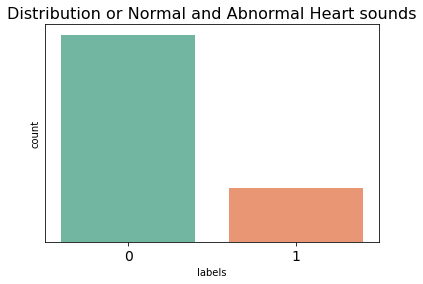

In [6]:
import seaborn as sns
plt.title("Distribution or Normal and Abnormal Heart sounds",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.yticks([])
sns.countplot(x='labels',data=df,palette="Set2")
plt.show()
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')


# Split the Dataset and balance the y variable

In [7]:
### Split the dataset into independent and dependent dataset


In [8]:
X = df.iloc[:,0:40]
# y = df["class"]

In [9]:
X.shape

(3240, 40)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,3.970105,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,2.601242,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.034146,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.486486,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.368080,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410


In [11]:
y = df[["labels"]]

In [12]:
y.shape

(3240, 1)

# Using SMOTE Algorithm to balance data

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)

In [14]:
X_sm.shape

(5150, 40)

In [15]:
y_sm.shape

(5150, 1)

In [16]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)


# Random forest classifier with Hyperparameter tuning

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
parameters = {"n_estimators":[10,100],
              'criterion':['gini','entropy'],
             'max_depth':[20,60,'None','sqrt'],
             'bootstrap':['True','False']}
random = RandomizedSearchCV(estimator=rf,param_distributions=parameters,verbose=1,n_jobs=-1)
random.fit(X_train,y_train)
random.best_params_,random.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\heera\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\heera\anaconda3\lib\site-packages\jo

({'n_estimators': 100,
  'max_depth': 20,
  'criterion': 'gini',
  'bootstrap': 'True'},
 0.9381067961165049)

In [18]:
rf = RandomForestClassifier(n_estimators= 100,
 max_depth= 60,
 criterion= 'gini',
 bootstrap= False)
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
print(classification_report(y_test,y_predrf))

<ipython-input-18-cda24e11630e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       526
           1       0.94      0.96      0.95       504

    accuracy                           0.95      1030
   macro avg       0.95      0.95      0.95      1030
weighted avg       0.95      0.95      0.95      1030



# Confusion matrix of test data

C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


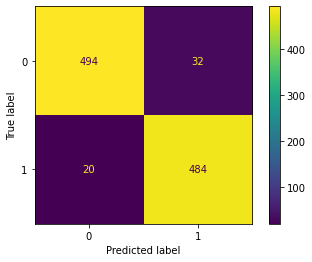

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,X_test, y_test)  
plt.show()

In [20]:
df_val = pd.read_csv('C:/Users/heera/Desktop/Dissertation/Data Physionet/validation/merged_val.csv')


In [21]:
df_val= df_val.rename(columns={"0.1": "labels"})

In [22]:
df_val["labels"].value_counts()

1    151
0    150
Name: labels, dtype: int64

In [23]:
Xv = df_val.iloc[:,0:40]
# y = df["class"]

In [24]:
yv= df_val[["labels"]]

In [25]:
from sklearn.model_selection import train_test_split
X_train = X
y_train =y
l_test =Xv
m_test =yv

In [26]:
#Validation accuracy
rf.score(l_test, m_test)

0.973421926910299

In [27]:
#Test accuracy
rf.score(X_test, y_test)

0.9495145631067962

# Confusion matrix Validation data

C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


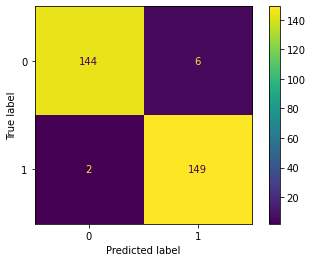

In [28]:
plot_confusion_matrix(rf,l_test, m_test)  
plt.show()